#### 1) precipitation anomaly maps for each WT 
#### 2) Precipitation Seasonal anomaly of ECMWF
- 2.1) seasonal climatology
- 2.2) seasonal anomaly

In [70]:
import sys
import datetime
import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import xarray as xr
import matplotlib.pyplot as plt
import glob 
import os.path
import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# inorder to import my pathon module, add
# $PYTHONPATH for jupyter for module
sys.path.append("/glade/u/home/mingge/PYTHON")
import coexist_func 
from importlib import reload
reload(coexist_func)

from coexist_func import plot_prec_12
from coexist_func import plot_prec_12_erai 
from coexist_func import cal_prec_ano_ecmwf
from coexist_func import cal_prec_cli_ecmwf
from coexist_func import cal_season_cli_ecmwf_nc
from coexist_func import cal_season_ano_ecmwf_nc

#### read domain info

In [2]:
# centroid_ana.ibynb, wt_hist_smyle_era5.ipynb
# to read domain info
sCentroids='/glade/u/home/mingge/WTing_existing-centroids/CONUS-WTs_existing_centroids.npz'
DATA=np.load(sCentroids)
rgrCentroids=DATA['rgrCentroids']               # (12, 3, 24, 74)
rgiWTs=range(1, rgrCentroids.shape[0]+1, 1)     # number of WT 

lat_s = DATA['rgrLatWT'].min() - 6
lat_e = DATA['rgrLatWT'].max() + 2
lon_s = DATA['rgrLonWT'].min() 
lon_e = DATA['rgrLonWT'].max() + 6
print('lat:', lat_s , '-', lat_e, 'lon:', lon_s, '-', lon_e)

season_dict = {
    'DJF': [12,1,2],
    'MAM': [3,4,5],
    'JJA': [6,7,8],
    'SON': [9,10,11],
    'JAS': [7,8,9]}

n_season = len(season_dict)
n_season = 4

year_s = 1993
year_e = 2021
n_year = year_e - year_s + 1

n_fcst = 215

n_wt = 12

lat: 24.75 - 50.0 lon: -125.25 - -64.5


In [3]:
dir_ecmwf = '/glade/campaign/mmm/c3we/ECMWF/'
dir_wt = '/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/'

#### calculate prec climatology

In [32]:
# get dimension size info
with xr.open_dataset(dir_wt + 'prec/prec_daily_mem51_202112.nc') as ds:
    nl_lat = ds.dims['lat']  
    nl_lon = ds.dims['lon']
    lat    = ds.lat
    lon    = ds.lon
    print(nl_lat, nl_lon)

41 76


 - lead month 1 climatology

In [27]:
is_leadMonth1 = True
flnm_o = dir_wt + 'prec_clim_leadMonth1_eachMem.nc'
prec_clim_xr = cal_prec_cli_ecmwf(dir_wt, nl_lat, nl_lon, year_s, year_e, is_leadMonth1, flnm_o)

/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_clim_leadMonth1_eachMem.nc exist
precipitation mean of 51 members


 - 215 fcst day climatology

In [25]:
is_leadMonth1 = False
flnm_o = dir_wt + 'prec_clim_215day_eachMem.nc'
prec_clim_xr = cal_prec_cli_ecmwf(dir_wt, nl_lat, nl_lon, year_s, year_e, is_leadMonth1, flnm_o)

/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_clim_215day_eachMem.nc exist
precipitation mean of 51 members


#### precipitation anomalies of WTs
 -  use ensemble mean climatology

In [18]:
flnm_cli = dir_wt + 'prec_clim_215day_eachMem.nc'
is_mean = True
cal_prec_ano_ecmwf(dir_wt,  year_s, year_e, lat_s, lat_e, lon_s, lon_e, is_mean, flnm_cli)

/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem01.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem02.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem03.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem04.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem05.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem06.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem07.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem08.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem09.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem10.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem11.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem12.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem13.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem14.nc exist
/glade/campaign/mmm/

In [22]:
flnm_cli = dir_wt + 'prec_clim_215day_eachMem.nc'
is_mean = False
cal_prec_ano_ecmwf(dir_wt,  year_s, year_e,lat_s, lat_e, lon_s, lon_e, is_mean, flnm_cli)

/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem01_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem02_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem03_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem04_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem05_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem06_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem07_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem08_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem09_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem10_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem11_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem12_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_ano_mem13_ind.nc exist
/glade/campaign/mmm/c3we/mingge/COEXIS

#### ensemble average precipitation anomaly maps for each WT

https://www.frontiersin.org/articles/10.3389/fenvs.2019.00036/full

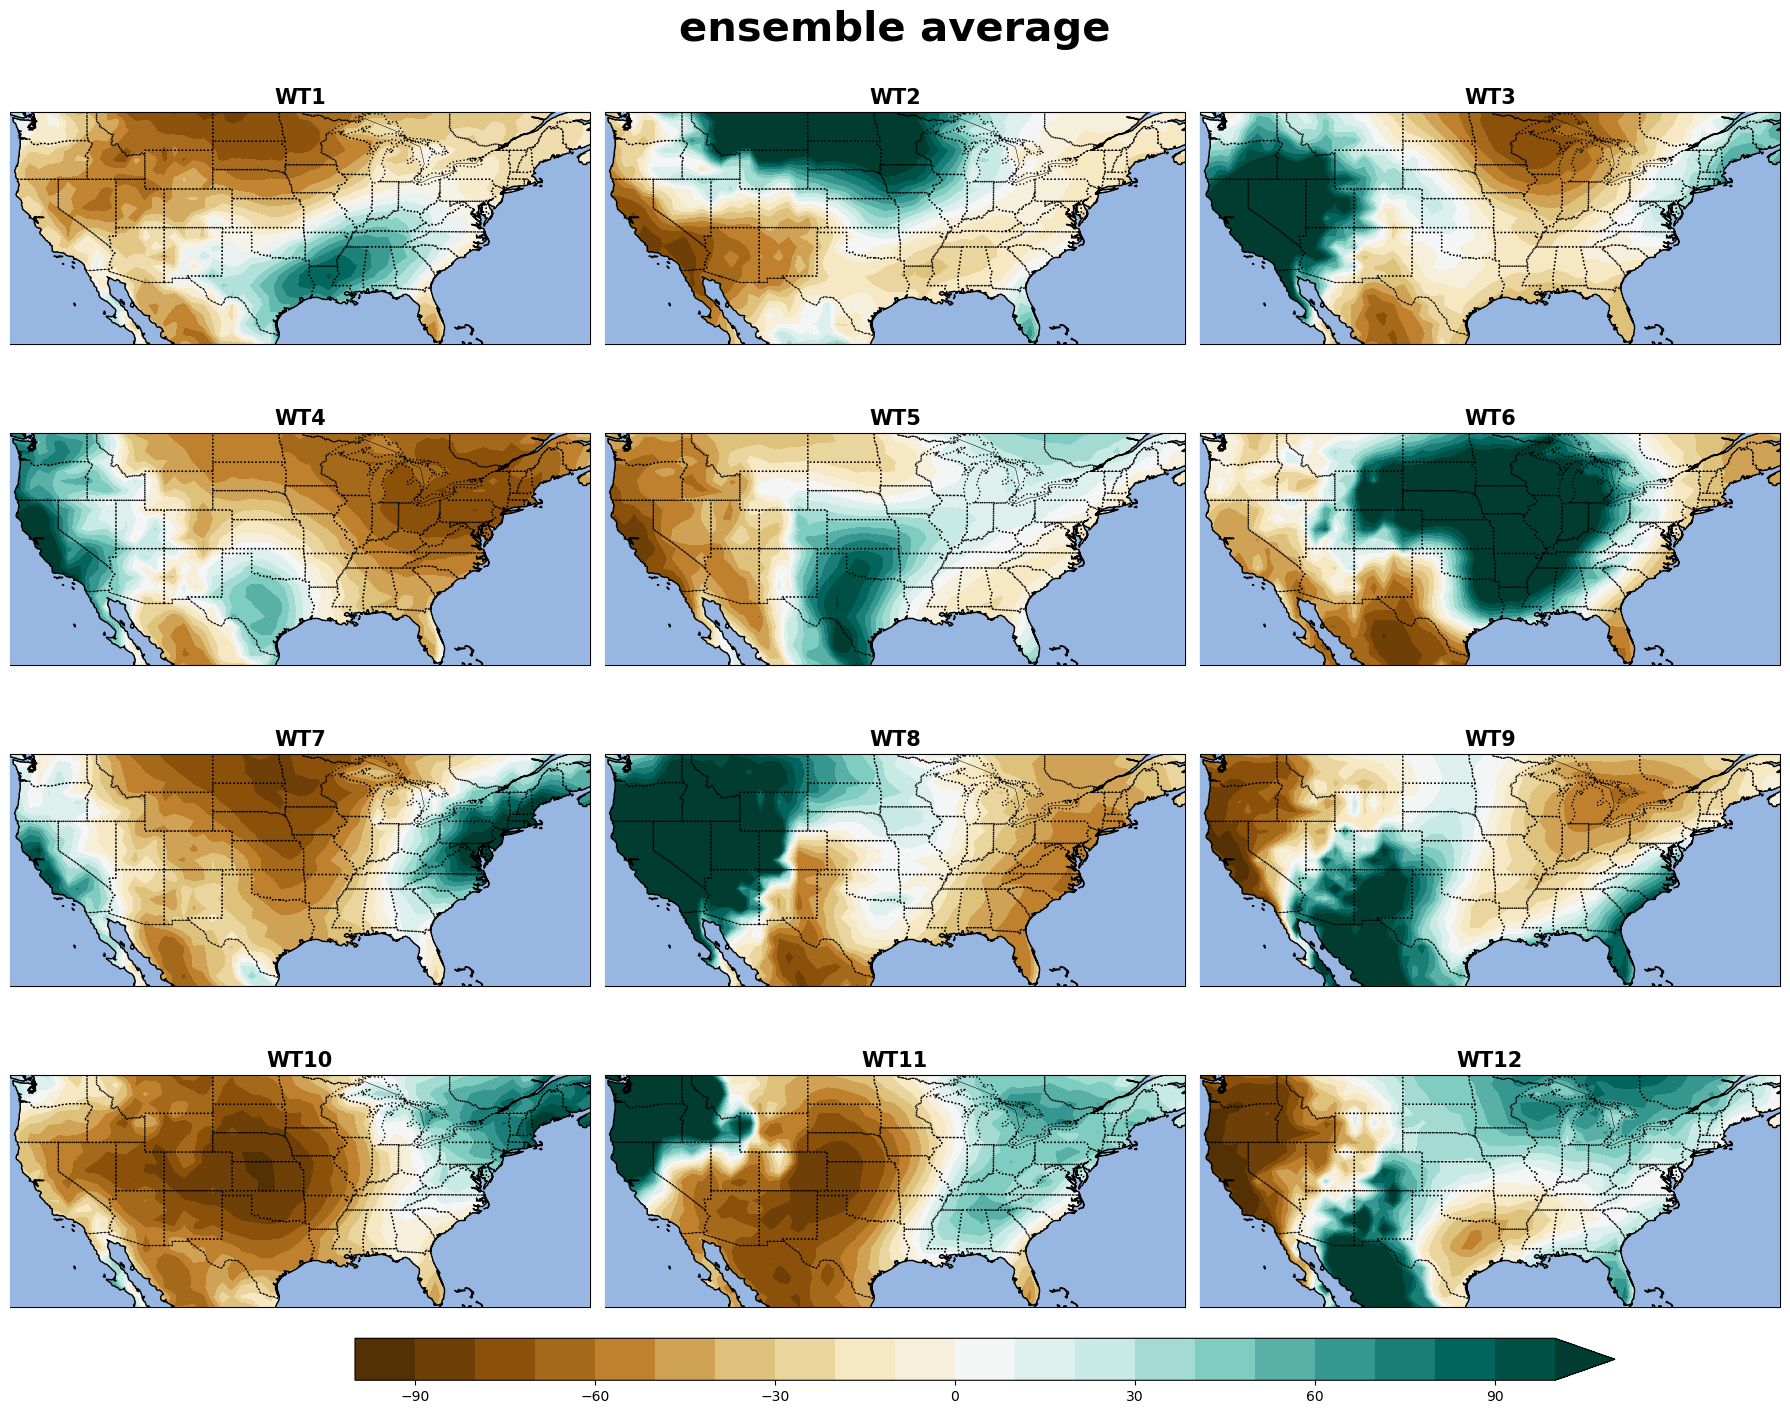

In [31]:
n_mem = 25
for mem in range(1, n_mem+1,1):
    mem_s = str(mem).zfill(2)
    flnm_wt = dir_wt + 'prec_ano_mem' + mem_s + '.nc'
    #print(flnm_wt)
    
    with  xr.open_dataset(flnm_wt) as ds_prec:
        prec_wt = ds_prec.__xarray_dataarray_variable__*100
        if mem == 1:
            prec_avg = prec_wt.copy()
        else:
            prec_avg = prec_avg + prec_wt
prec_avg = prec_avg/n_mem
plot_prec_12_erai(prec_avg, -100, 100, 21, 'BrBG', 'horizontal', 'ensemble average')

#### 2) Precipitation Seasonal anomaly of ECMWF
- 2.1) seasonal climatology

In [55]:
flnm_cli = dir_wt + 'prec_seasonal_cli.nc'
prec_cli_xr = cal_season_cli_ecmwf_nc('TP_GDS0_SFC', dir_wt, season_dict, year_s, year_e, lat, lon, flnm_cli)

/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_seasonal_cli.nc exist


- 2.2) seasonal anomaly

In [73]:
flnm_cli = dir_wt + 'prec_seasonal_cli.nc'
flnm_o = dir_wt + 'prec_seasonal_ano.nc'
cal_season_ano_ecmwf_nc('TP_GDS0_SFC', dir_wt, dir_wt + 'WT_01/', season_dict, year_s, year_e, lat, lon, flnm_cli)

/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec_seasonal_cli.nc
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec/prec_seasonal_ano_mem01.nc
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec/prec_seasonal_ano_mem02.nc
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec/prec_seasonal_ano_mem03.nc
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/prec/prec_seasonal_ano_mem04.nc
1993
1994
1995
1996
1997
1998
1999
2000
2

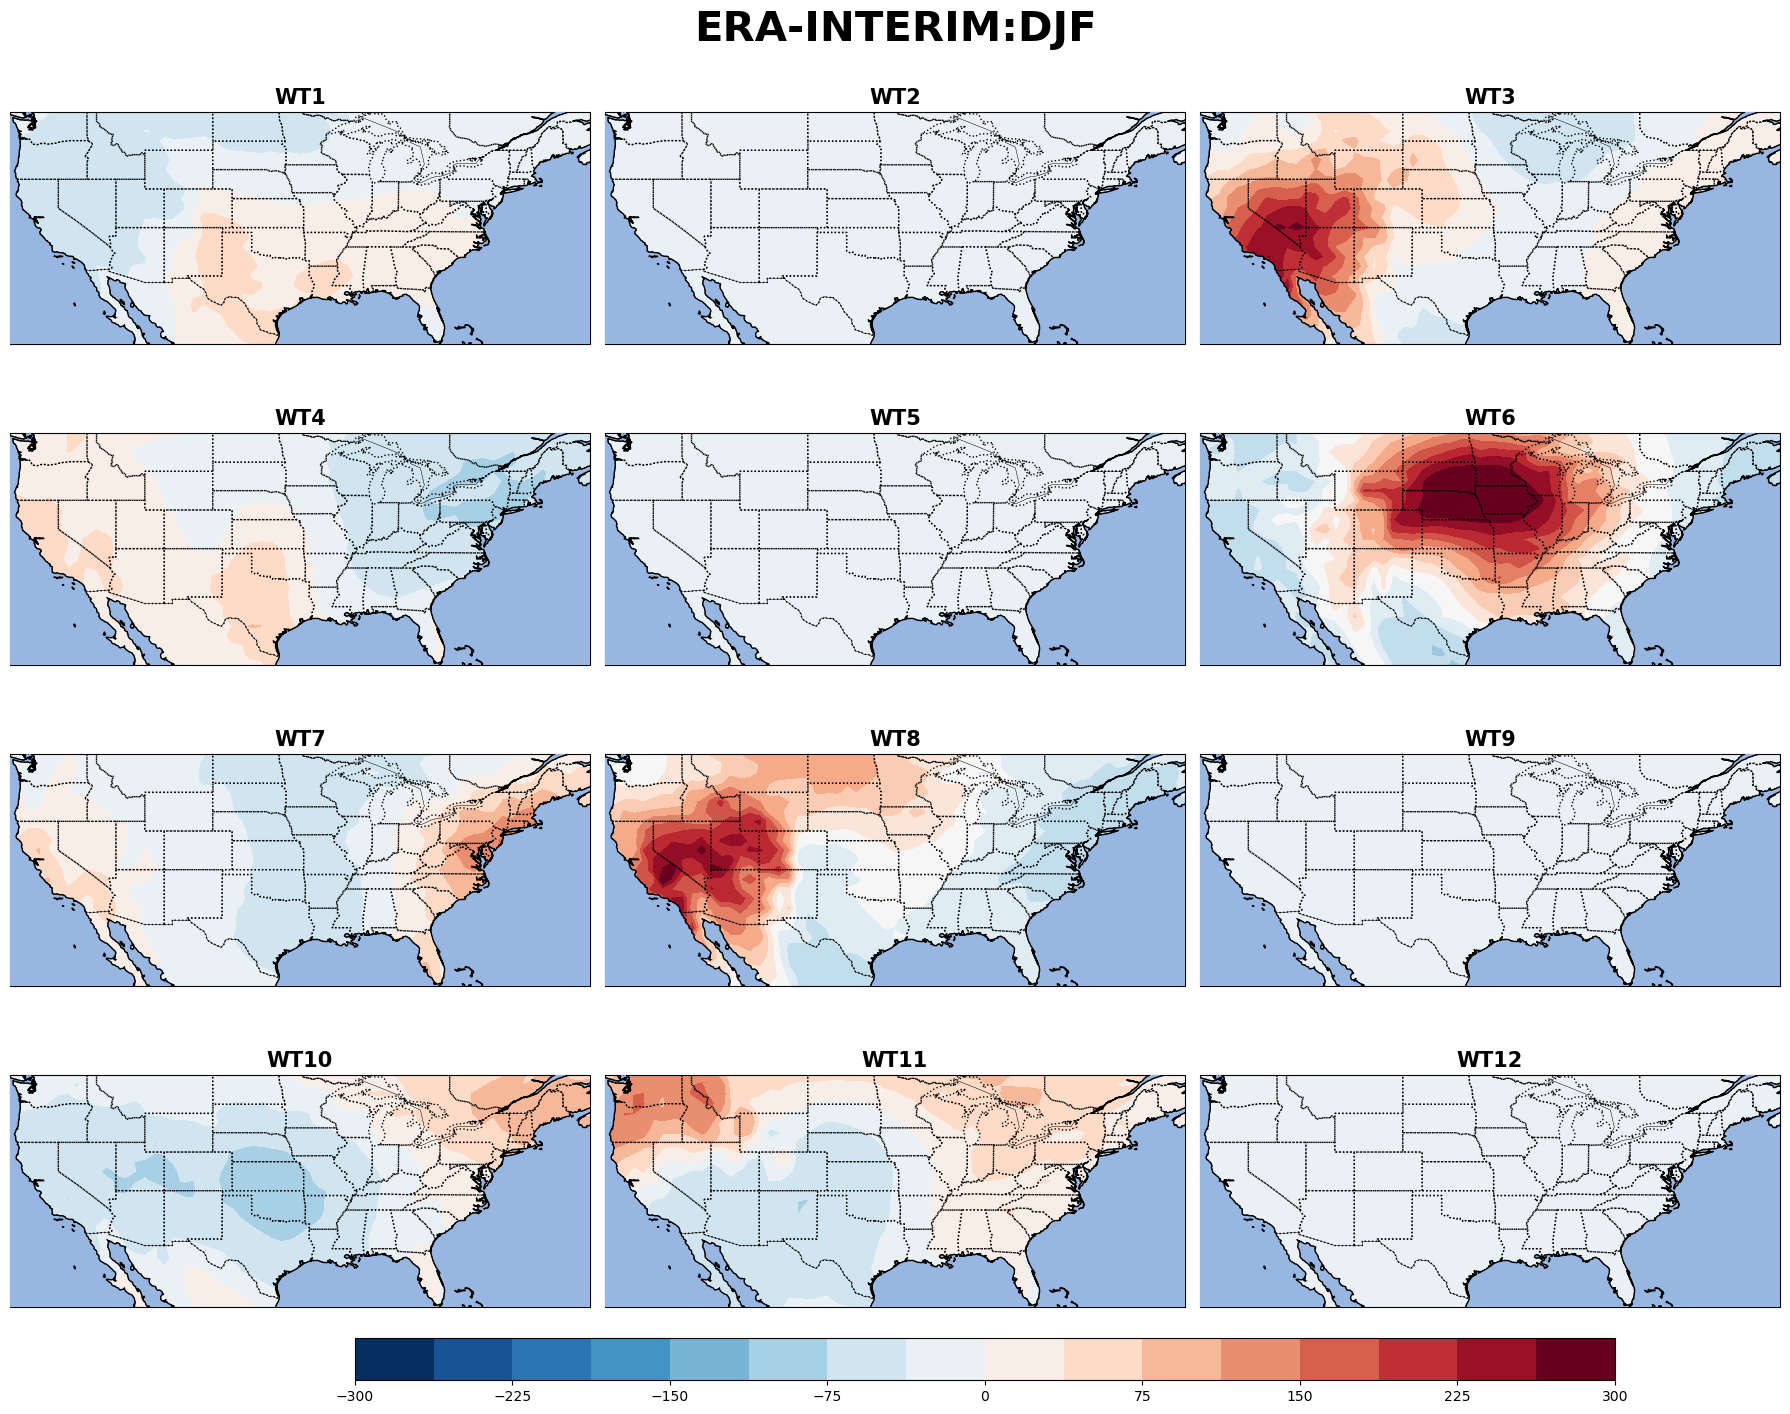

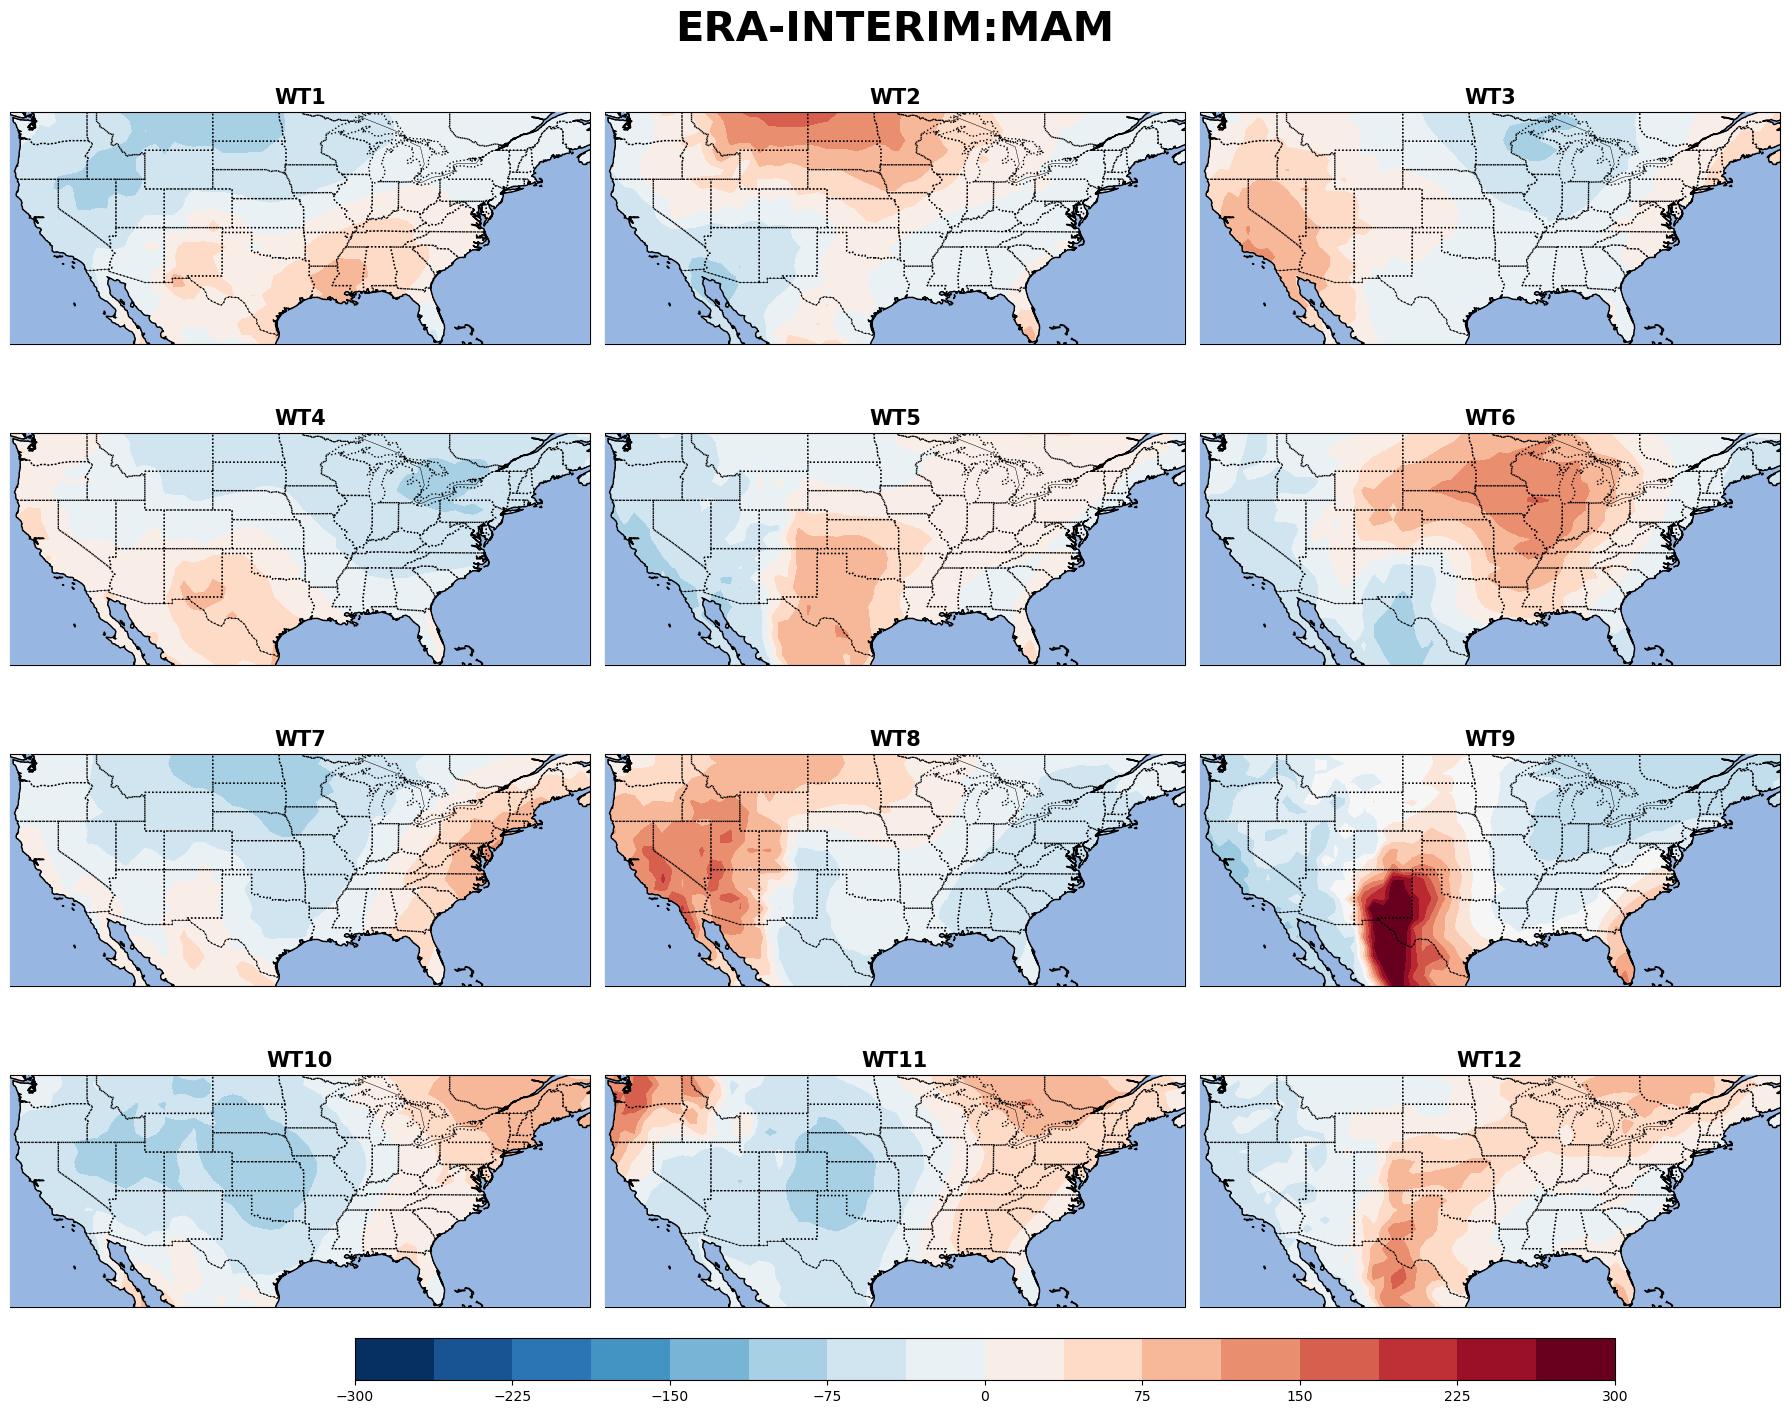

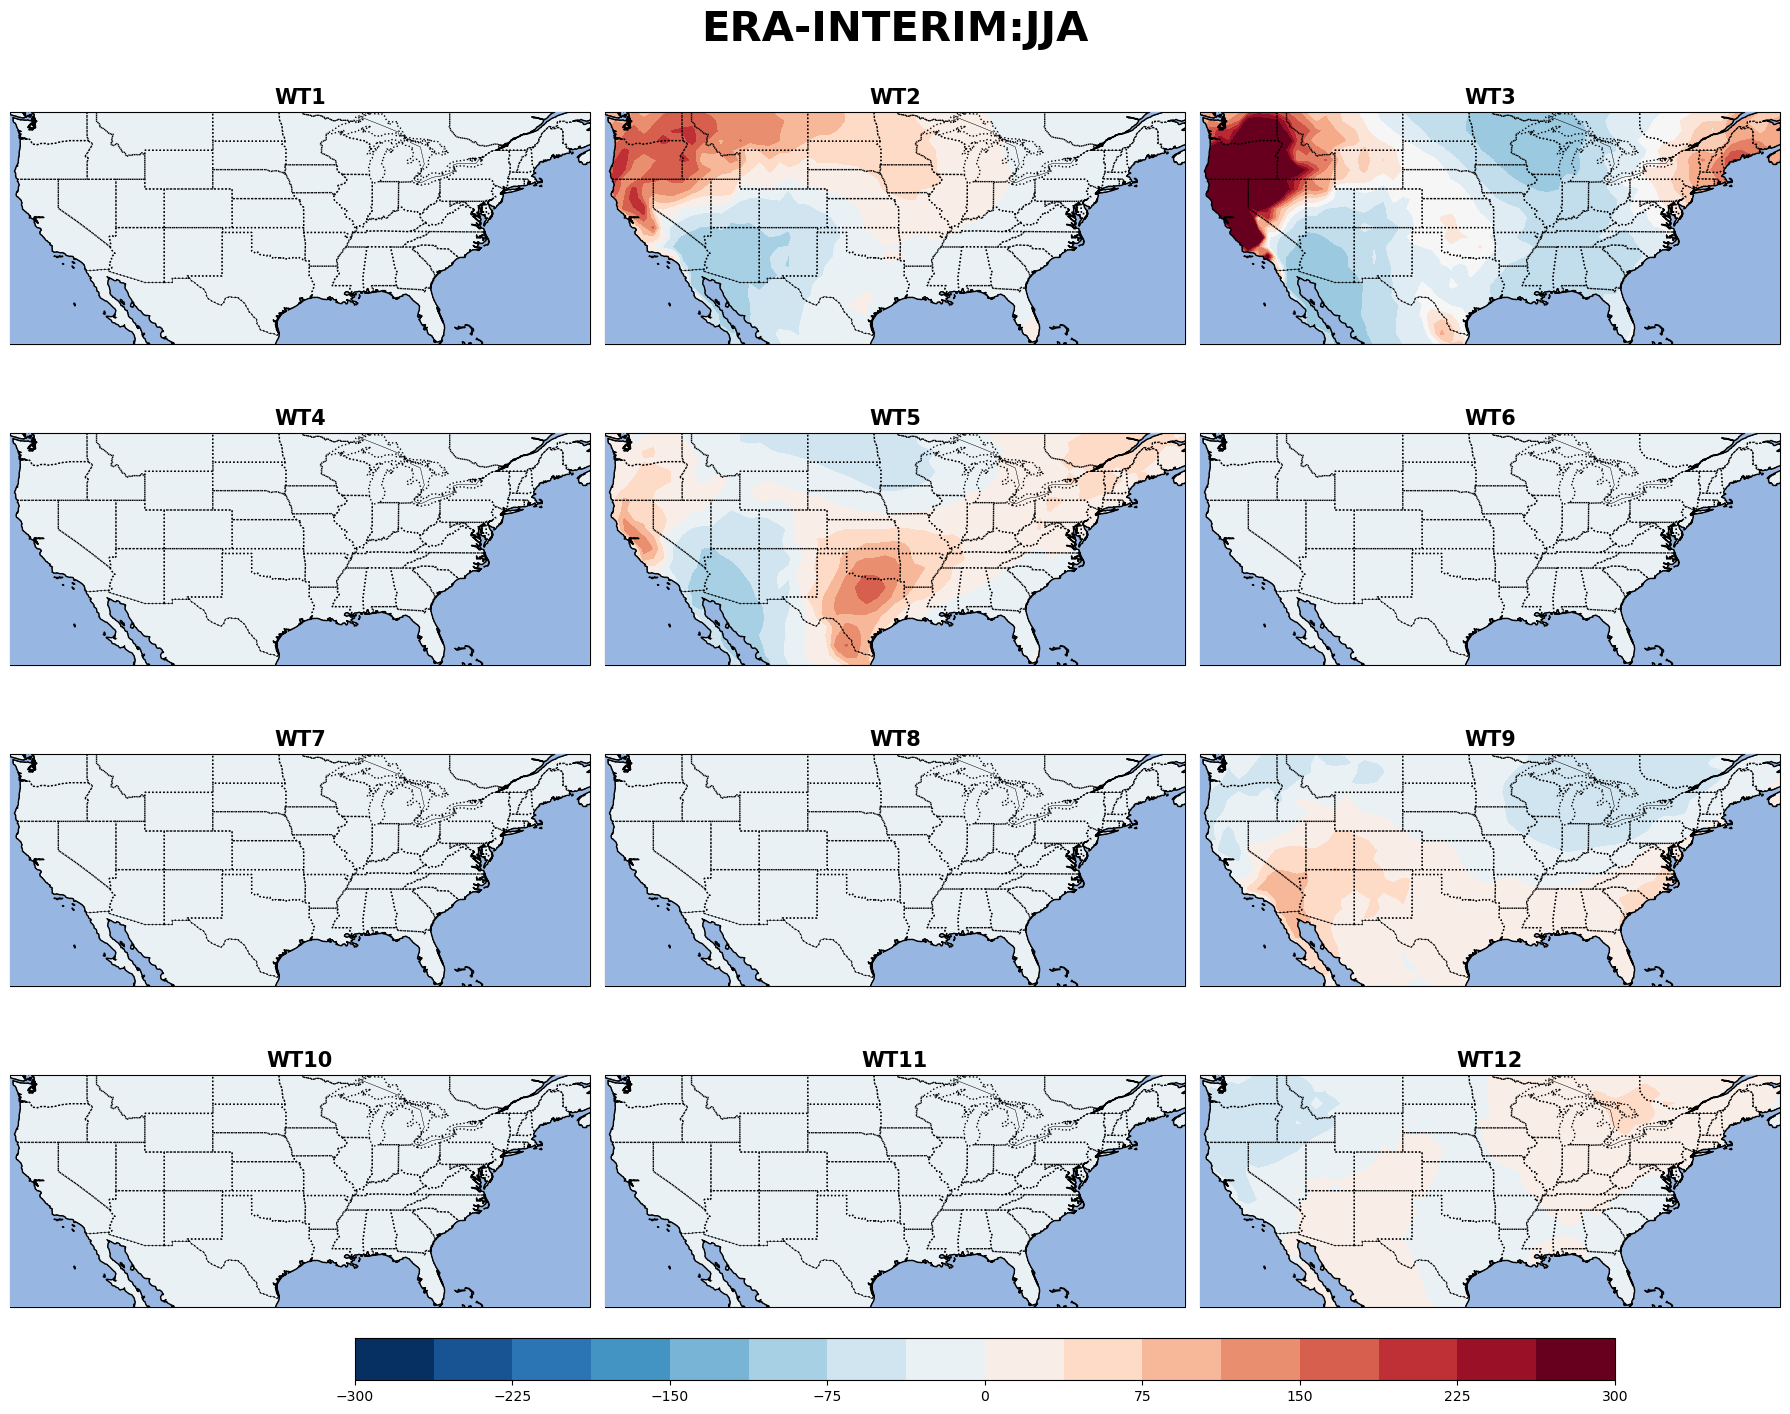

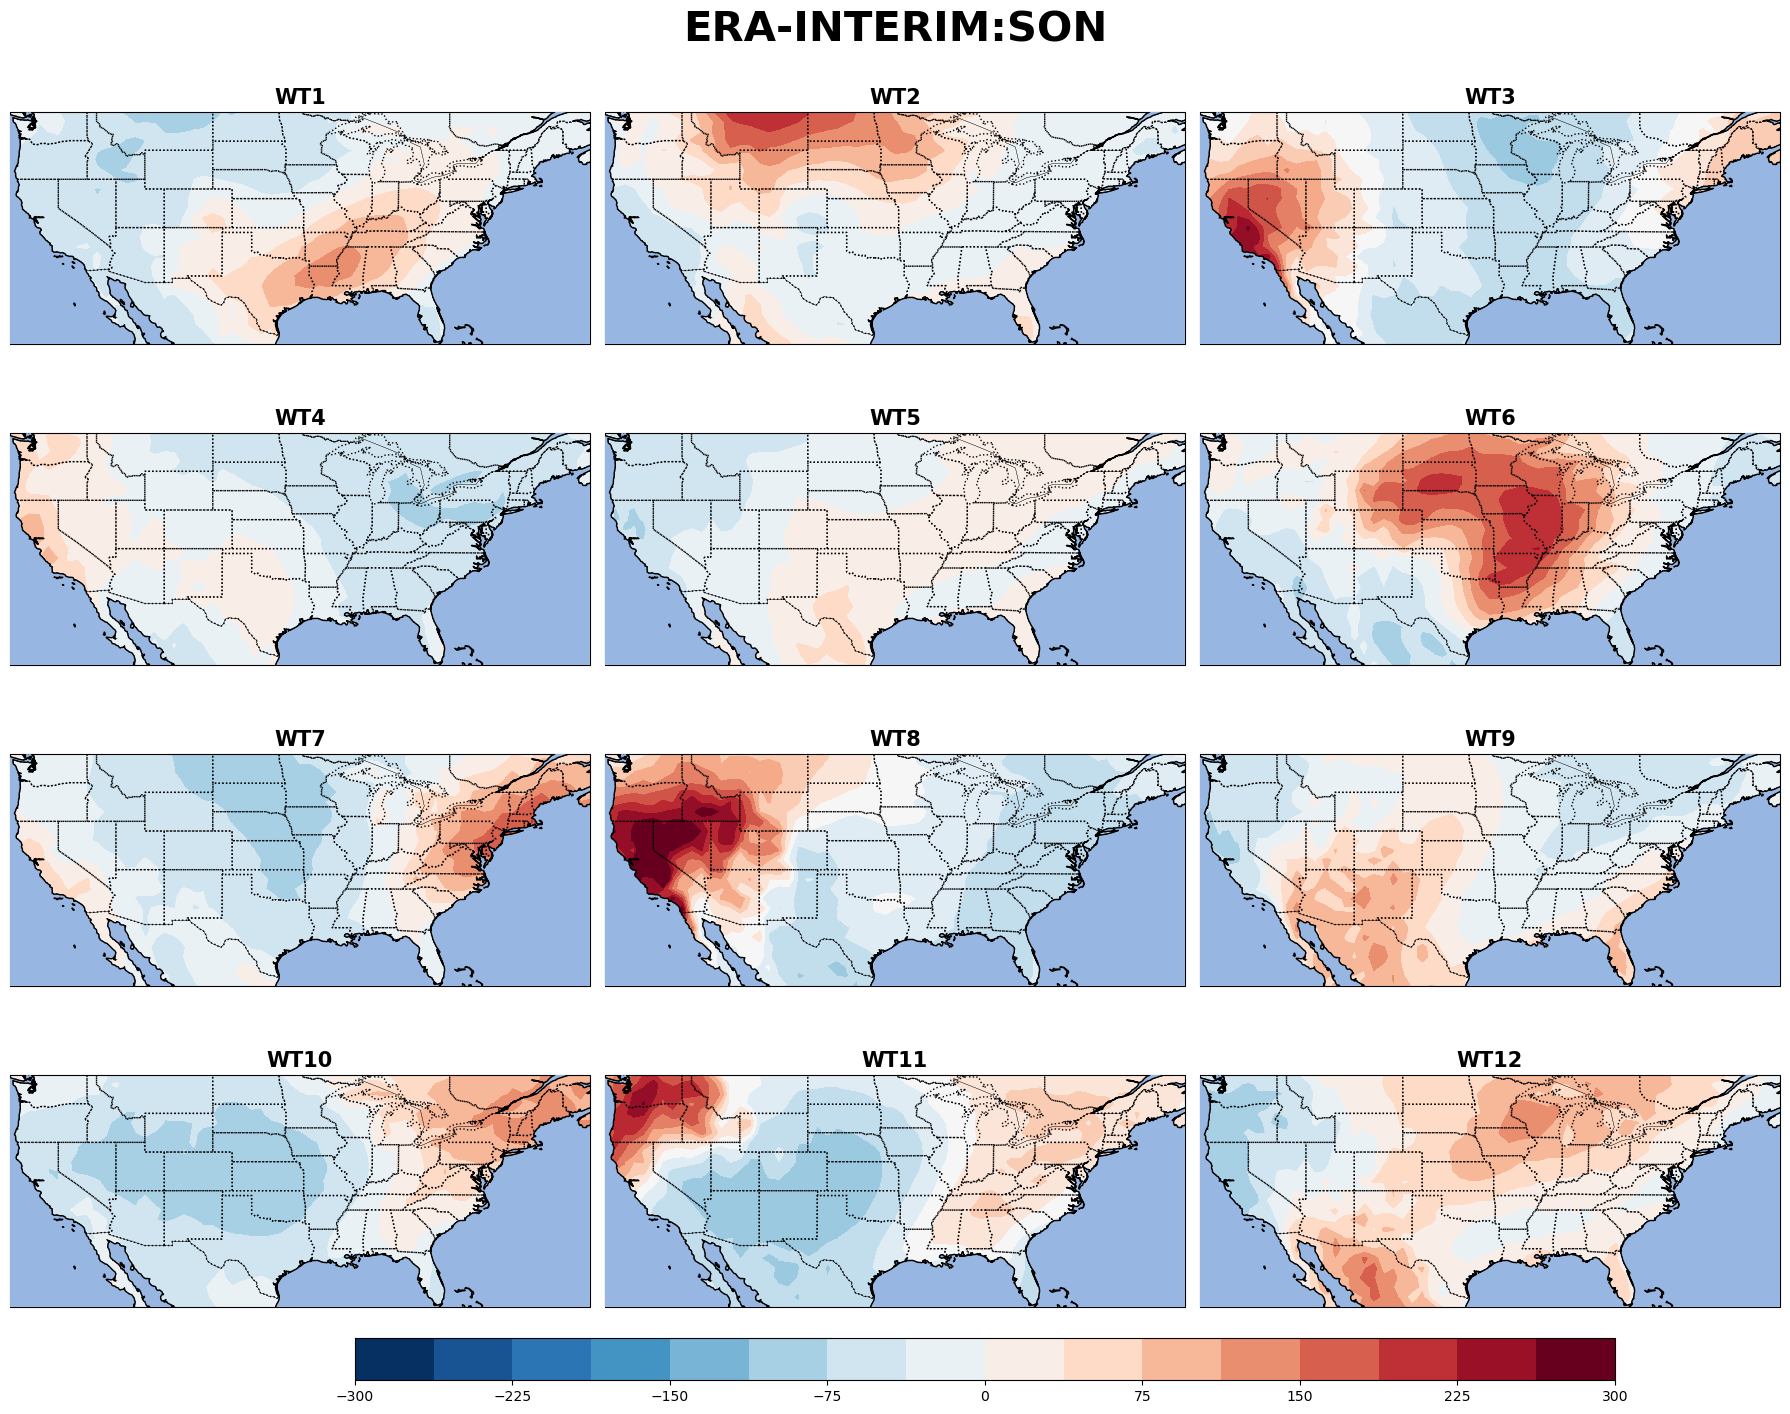

In [79]:
for mem in range(1,26):
    mem_s = str(mem).zfill(2) 
    flnm = dir_wt + 'prec/prec_seasonal_ano_mem' + mem_s + '.nc'
    mem_s = str(mem).zfill(2) 
    with  xr.open_dataset(flnm) as ds:
        # proj = ccrs.PlateCarree(central_longitude=180)
        # longitude from [-180, 180] -> [0,360]
        #ds.coords['longitude'] = xr.where(ds['longitude'] < 0, ds['longitude'] + 360, ds['longitude'])
        #ds = ds.sortby(ds.longitude)
        if mem == 1: 
            z500_wt = ds.__xarray_dataarray_variable__.sel(lat=slice(lat_e, lat_s), lon=slice(lon_s, lon_e))
        else:
            z500_wt = z500_wt + ds.__xarray_dataarray_variable__

season_s = ['DJF','MAM','JJA','SON']            
 
# Because proj = ccrs.PlateCarree(central_longitude=180)
# I need to convert longitude from [-180, 180] -> [0,360]
#z500_wt.coords['longitude'] = xr.where(z500_wt['longitude'] < 0, z500_wt['longitude'] + 360, z500_wt['longitude'])
#z500_wt = z500_wt.sortby(z500_wt.longitude)
 
z500_wt = z500_wt/25
 
for ns in range(4):  
    plot_prec_12_erai(z500_wt[:,ns]*100, -300, 300, 17, 'RdBu_r', 'horizontal', 'ERA-INTERIM:' + season_s[ns]);
    '''
    if ns == 2:     
        plot_prec_12(z500_wt[:,ns], -1, 1, 17, 'coolwarm', 'horizontal', season_s[ns]);
    else:
        plot_prec_12(z500_wt[:,ns], -3, 3, 19, 'coolwarm', 'horizontal', season_s[ns]); 
    '''